# Search and sort


## Search algorithms

**Prior knowledge:** Strings and lists in Python

In [1]:
#This is a String. 

"I am a string!"

#Saving it in a variable.

text_string = "I am a string!"

#For the case of searching it can be helpful to think of a string as a list of characters. 
#That means individual characters can be referenced by their position in the string (staring with 0!).

print("The first character:")
print(text_string[0])

#Other list operations work too.

print("Characters from position 7 (included) to 14 (not included):")
print(text_string[7:14])


print("Only the last character:")
print(text_string[-1])

The first character:
I
Characters from position 7 (included) to 14 (not included):
string!
Only the last character:
!


In [2]:
#len() can be used to obtain the length of a string. 

len(text_string)

14

In [3]:
#A for loop can be used to iterate over each individual character.

for i in range(14):
    print(text_string[i])

#This in combination with len() can be used to iterate over the characters in a string without 
#knowing its excact length.


for i in range(len(text_string)):
    print(str(i) + ": " + text_string[i])
    
#Be careful however, while the positions of a string start with 0 (in this case 0 - 13), 
#the function len() returns the absolute number of characters.
#Luckily this poses no problem with range(), it does not include the given parameter in the list.
#range(13) -> [0,1,2,3,...,10,11,12]
#text_string[len(text_string)] does NOT give you the last element!

for c in text_string:
    print('T:', c)

I
 
a
m
 
a
 
s
t
r
i
n
g
!
0: I
1:  
2: a
3: m
4:  
5: a
6:  
7: s
8: t
9: r
10: i
11: n
12: g
13: !
T: I
T:  
T: a
T: m
T:  
T: a
T:  
T: s
T: t
T: r
T: i
T: n
T: g
T: !


### Linear Search 
(ref: Chapter 5.1.1 p. 116)

In [4]:
#Probably the simplest way to search in a string or list is the linear search.
#It just checks every character or list entry from beginning to end.

string_to_search = "Where is @the@ at sign?"
pattern = "@"

for i in range(len(string_to_search)):
    
    if string_to_search[i] == pattern:
        
        print("Pattern found at position " + str(i))

Pattern found at position 9
Pattern found at position 13


<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 4</h2>
    <ul>
        <li style="color:red">How many times is the <code>for i in range(len(string_to_search))</code> loop performed?</li>
        <li style="color:red">Rewrite the loop to search the string from back to front.</li>
        <li style="color:red">Note: <a href="https://www.w3schools.com/python/ref_func_range.asp">range</a></li>
    </ul>
</div>

In [6]:
string_to_search = "Where is @the@ at sign?"
pattern = "@"
i = len(string_to_search)
while i != 0:
    i -= 1
    if string_to_search[i] == pattern:
        
        print("Pattern found at position " + str(i))

Pattern found at position 13
Pattern found at position 9


We now write our own function for this linear search, which we can use to search both lists and strings:

In [8]:
#A simple linear search function

def lin_search(string_or_list,key):
    
    for i in range(len(string_or_list)):
        
        if string_or_list[i] == key:
            
            return i
        
    return "no_key"

In [9]:
#The function returns the position of the first instance encountered.
out = lin_search("Hello World!", "W")

assert out == 6

print(out)

6


In [10]:
#The same function also works for lists.

search_list = ["dog", "cat", "bird", "fish"]

out = lin_search(search_list, "fish")

assert out == 3

print(out)

3


### Binary Search
(ref: Chapter 5.1.2 p. 118)

To determine the middle position of a list, we use division with truncation (["floor division"](https://python-reference.readthedocs.io/en/latest/docs/operators/floor_division.html)) `//`: Here the (possible) decimal places of a division are cut off and we get an integer (i.e. a whole number).

<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 5</h2>
    <li style="color:red">Given the lists <code>my_list1</code>, <code>my_list2</code>.</li>
    <li style="color:red">Use the "floor division" to determine the middle positions (<i>Index</i>) of these lists.</li>
    <li style="color:red">Note that positions start at 0 and round down if there is no middle position.</li>
</div>

In [12]:
my_list1 = ["first", "second", "middle", "somewhere", "last"]
my_list2 = [7, 5, 4, 3, 6, 9]

In [22]:
# Exercise 5: your code here
def get_middle_position(my_list):
    if len(my_list)%2 != 0:
        return(len(my_list)//2)
    if len(my_list)%2 == 0:
        return(len(my_list)//2-1)

In [25]:
print(get_middle_position(my_list1))
print(get_middle_position(my_list2))
print(my_list1[get_middle_position(my_list1)])
print(my_list2[get_middle_position(my_list2)])

2
2
middle
4


Here is an implementation of a binary search. Read through the documentation (given as a comment here).

In [44]:
#Example implementation of a binary search search function in python:

#The function takes an ordered list as input as well as a key.
#In this case both have to be integers and the first occurance the function finds is returned.
#(Not necesserily the first in the ordered list)
#If you want to see how the middle, upper and lower limit change while running the function a debug parameter 
#provided. To turn it on call the function with 'debug = True'.

def bin_search(x, key, debug = True):
    
    low_lim = 0 
    up_lim = len(x) -1
    
    while low_lim <= up_lim:
    
        #The middle between upper and lower limit is calculated using the floored division operator '//'.
        print(low_lim,up_lim)
        middle = (low_lim + up_lim)//2
        print(middle)
    
        if x[middle] == key:
        
            #If the key matches the middle it is returned.
        
            return middle
        
        #Otherwise, the upper or lower limit are adjusted to lie closer around the key.
    
        elif x[middle] > key:
        
            up_lim = middle - 1
        
        else:
        
            low_lim = middle + 1
            
        if debug == True:
        
            print('DEBUG: lower='+str(low_lim) + ', upper=' + str(up_lim) + ', middle=' + str(middle))
    
    #This is repeated until the key is found or the lower and upper limit meet.
    #In the latter case "No Key" is returned.
    
    return "no_key"


In [45]:
#Let's put it to the test:

num_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

out = bin_search(x = num_list,key = 1, debug = True)

assert out == 0

print(out)

0 19
9
DEBUG: lower=0, upper=8, middle=9
0 8
4
DEBUG: lower=0, upper=3, middle=4
0 3
1
DEBUG: lower=0, upper=0, middle=1
0 0
0
0


In [ ]:
out = bin_search(x = num_list,key = 28)

assert out == 'no_key'

print(out)

### Built-in Functions: Built-in search functions

Python comes with built-in search functions that we don't need to install/import.
This allows strings and lists to be searched:

In [31]:
#To check whether a key exists in a list 'in' is used:
#It returns a boolean value (True/False)

out = 3 in [1,2,3]

assert out == True

print(out)

True


In [32]:
num_list = [1,2,4,8,9,12,16,19,20,23,26,33,40,58]

out = 54 in num_list

assert out == False

print(out)

False


In [33]:
out = 'a' in 'atari'

assert out == True

print(out)

True


In [34]:
out = 'b' in 'atari'

assert out == False

print(out)

False


In [35]:
#To find out the position of a key the 'index' function can be used:

out = num_list.index(16)

assert out == 6

print(out)

6


In [36]:
#If the key is not present in the list/string a ValueError is returned:

num_list.index(3)

ValueError: 3 is not in list

In [37]:
#This works both on ordered and unordered list/strings, however, only the first occurance of a key is returned.

out = 'atari'.index('a')

assert out == 0

print(out)

0


<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 6</h2>
    <ul>
        <li style="color:red">Search in 2-dimensional matrix:</li>
        <li style="color:red">Find the coordinates of all squares of this "chess board" whose playing figure contains an umlaut (ä, ö, ü).</li>
        <li style="color:red">To do this, create a function that receives a 2-dimensional matrix and a list of umlauts as parameters.</li>
        <li style="color:red">A 2-dimensional matrix with coordinates should be returned as the return value.</li>
        <li style="color:red">OUTPUT: <code>[[0, 2], [0, 4], [0, 5], [7, 2], [7, 3], [7, 5]]</code></li>
        <li style="color:red">Note: Here, the row is specified first, then the column.</li>
    </ul>
</div>



In [59]:
matrix = [  [  'Turm', 'Springer', 'Läufer',  'Dame', 'König', 'Läufer', 'Springer', 'Turm'  ],
            [ 'Bauer',    'Bauer',  'Bauer', 'Bauer', 'Bauer',  'Bauer',    'Bauer', 'Bauer' ],
            [ '-----',    '-----',  '-----', '-----', '-----',  '-----',    '-----', '-----' ],
            [ '-----',    '-----',  '-----', '-----', '-----',  '-----',    '-----', '-----' ],
            [ '-----',    '-----',  '-----', '-----', '-----',  '-----',    '-----', '-----' ],
            [ '-----',    '-----',  '-----', '-----', '-----',  '-----',    '-----', '-----' ],
            [ 'Bauer',    'Bauer',  'Bauer', 'Bauer', 'Bauer',  'Bauer',    'Bauer', 'Bauer' ],
            [  'Turm', 'Springer', 'Läufer', 'König',  'Dame', 'Läufer', 'Springer', 'Turm'  ],  ]


def contains_key(keys, pos):
    for i in keys:
        if i in pos:
            return True
    return False


def myFunction(matrix, keys):
    arr = []
    for y in range(len(matrix)):
        row = matrix[y]
        #print(matrix[y])
        for x in range(len(row)):
            pos = row[x]
            #print(row[x])
            if contains_key(keys, pos):
                arr.append([y, x])
    return arr
        

print(myFunction(matrix, ['ä', 'ö', 'ü']))
print(len(matrix))
assert myFunction(matrix, ['ä', 'ö', 'ü']) == [[0, 2], [0, 4], [0, 5], [7, 2], [7, 3], [7, 5]]
print(matrix[7][1])


[[0, 2], [0, 4], [0, 5], [7, 2], [7, 3], [7, 5]]
8
Springer


## Sorting algorithms

We use sorting algorithms to rearrange a set of unsorted elements into an order.

This process can be applied to a variety of objects. Typical examples are a list or an array.

### Bubble sort / Shell sort

The "bubble sort" is one of the simplest, but not the most efficient sorting algorithms, which is why it is hardly used in practice.

With "bubble sort" the given set is iterated over and the current element is compared with the following element. If the current element is larger than the following element, they are swapped.

In [1]:
ary = [5, 3, 7, 10, 1, 4, 8]

def bubbleSort(ary):
    counter = 0
    for i in range(len(ary)):
        is_sorted = True
        #print(i)
        for j in range(len(ary) - i - 1):   # -i is used to reduce the runtime, as the highest elements are already ordered
                                            # -1 is used to avoid an index out of range error
            #print(j)
            
            if (ary[j] > ary[j + 1]):
                
                is_sorted = False
                #print(ary[j], ary[j+1])
                ary[j], ary[j+1] = ary[j+1], ary[j]
                counter += 1
                #print(ary[j], ary[j+1])
        
        if is_sorted:
            print("Number of swaps:",counter)
            break
    
    
bubbleSort(ary)
print("Sorted array:{ary}".format(ary = ary))


Number of swaps: 9
Sorted array:[1, 3, 4, 5, 7, 8, 10]


<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 7</h2>
    <ul>
        <li style="color:red">In the above example (<code>[5, 3, 7, 10, 1, 4, 8]</code>), how often is a swap performed with Bubble Sort?</li>
        <li style="color:red">Note: You don't have to go through the algorithm and count the swaps.</li>
        <li style="color:red">Just change <code>bubbleSort</code> and count each swap.</li>
    </ul>
</div>



### Insertion sort

It is a simple algorithm, but should only be used with small amounts of data, since efficiency is a critical factor.

With "Insertion sort" an element is selected and inserted at the correct position.

In [5]:
ary = [5,29,38,13,1,48,22,32,6,27,15,16]

def insertionSort(ary):
    for i in range(1, len(ary)):
        print("Iteration {i}: {ary}".
              format(i = i, ary = ary)) # remove # for detailed informations
        value = ary[i]
        j = i - 1
        while j >= 0 and value > ary[j]:
            ary[j + 1] = ary[j]
            j -= 1
        ary[j + 1] = value
insertionSort(ary)
print("Sorted array:{ary}".format(ary = ary))

Iteration 1: [5, 29, 38, 13, 1, 48, 22, 32, 6, 27, 15, 16]
Iteration 2: [29, 5, 38, 13, 1, 48, 22, 32, 6, 27, 15, 16]
Iteration 3: [38, 29, 5, 13, 1, 48, 22, 32, 6, 27, 15, 16]
Iteration 4: [38, 29, 13, 5, 1, 48, 22, 32, 6, 27, 15, 16]
Iteration 5: [38, 29, 13, 5, 1, 48, 22, 32, 6, 27, 15, 16]
Iteration 6: [48, 38, 29, 13, 5, 1, 22, 32, 6, 27, 15, 16]
Iteration 7: [48, 38, 29, 22, 13, 5, 1, 32, 6, 27, 15, 16]
Iteration 8: [48, 38, 32, 29, 22, 13, 5, 1, 6, 27, 15, 16]
Iteration 9: [48, 38, 32, 29, 22, 13, 6, 5, 1, 27, 15, 16]
Iteration 10: [48, 38, 32, 29, 27, 22, 13, 6, 5, 1, 15, 16]
Iteration 11: [48, 38, 32, 29, 27, 22, 15, 13, 6, 5, 1, 16]
Sorted array:[48, 38, 32, 29, 27, 22, 16, 15, 13, 6, 5, 1]


# Stable sorting process
In addition to the "Bubble sort", the "Insertion sort" is also a stable sorting method. This becomes relevant when sorting data that has a key.

A stable method leaves the order of the associated data records unchanged when sorting using the key values.

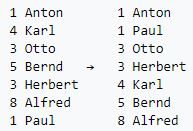

Anton stays ahead of Paul.

An unstable procedure also allows Paul to come before Anton.

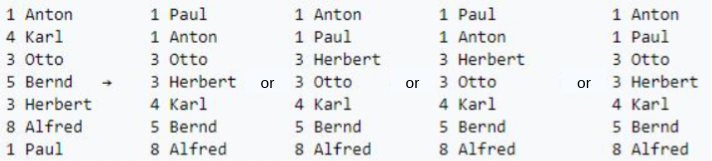

#### In - place

Furthermore, the "Bubble sort" and the "Insertion sort" are algorithms that work "in-place". In-place means that you don't need additional memory to sort the amount of data.

### Selection sort

Like the "bubble sort" and the "insertion sort", the "selection sort" is an algorithm that works "in-place". In contrast to the two algorithms mentioned, however, it is unstable in its basic form.

The list is split into two parts, a sorted part on the left and an unsorted part on the right. Initially, the sorted part is empty. Now the smallest element of the unsorted half is inserted into the sorted half.

In [81]:
ary = [4, 6, 8, 2, 9, 5, 1, 7, 3]

def selectionSort(ary):
    for i in range(len(ary)):
        print("Iteration {i}: {ary}".
              format(i = i, ary = ary)) # remove # for detailed informations
        min_index = i
        for j in range(i + 1, len(ary)):
            if (ary[min_index] > ary[j]):
                min_index = j
        tmp = ary[i]
        ary[i] = ary[min_index]
        ary[min_index] = tmp

selectionSort(ary)
print("Sorted array:{ary}".format(ary = ary))

Iteration 0: [4, 6, 8, 2, 9, 5, 1, 7, 3]
Iteration 1: [1, 6, 8, 2, 9, 5, 4, 7, 3]
Iteration 2: [1, 2, 8, 6, 9, 5, 4, 7, 3]
Iteration 3: [1, 2, 3, 6, 9, 5, 4, 7, 8]
Iteration 4: [1, 2, 3, 4, 9, 5, 6, 7, 8]
Iteration 5: [1, 2, 3, 4, 5, 9, 6, 7, 8]
Iteration 6: [1, 2, 3, 4, 5, 6, 9, 7, 8]
Iteration 7: [1, 2, 3, 4, 5, 6, 7, 9, 8]
Iteration 8: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Sorted array:[1, 2, 3, 4, 5, 6, 7, 8, 9]


### Built-In Functions: Built-in sorting functions

In most cases, manual programming of a sorting algorithm is no longer necessary, as common programming languages have already implemented built-in functions.

In [78]:
ary = [5, 3, 7, 10, 1, 4, 8]

ary.sort() # sort in ascending order

print("Ascending:{ary}".format(ary = ary))

ary.sort(reverse=True) # sort in descending order

print("Descending:{ary}".format(ary = ary))

Ascending:[1, 3, 4, 5, 7, 8, 10]
Descending:[10, 8, 7, 5, 4, 3, 1]


<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 8</h2>
    <ul>
        <li style="color:red">Find out how to automatically create a list of 100 random values and program it. You should then use this list. Now look for all values in the previously created list that contain the number 2 and save those values.</li>
        <li style="color:red">In the last step, use a sorting algorithm that you know to sort the values in ascending order.</li>
        <li style="color:red">Also justify why you have chosen this algorithm.</li>
    </ul>
</div>


In [33]:
# Exercise 8: your code here
import random

my_list = [random.randint(1, 100) for i in range(100)]
print('Random list:', my_list)

my_list2 = []
for values in my_list:
    if '2' in str(values):
        my_list2.append(values)

print('Values that contains 2: ', my_list2)

def bubble_sort(my_list):
    sorted_ary = True
    for j in range(len(my_list)-1):
        for i in range(len(my_list)-j-1):
            if my_list[i] > my_list[i+1]:
                my_list[i], my_list[i+1] = my_list[i+1], my_list[i]


bubble_sort(my_list2)
print("Sorted array:{ary}".format(ary=my_list2))

# I used a bubble sort due to its simplicity, 
# because performance is not an issue while working with a 100 items long list

Random list: [94, 71, 10, 37, 96, 92, 11, 1, 67, 27, 45, 96, 57, 60, 3, 94, 7, 65, 68, 40, 9, 47, 14, 43, 37, 100, 20, 91, 20, 70, 77, 76, 97, 71, 49, 90, 18, 56, 98, 57, 55, 28, 10, 19, 100, 92, 18, 60, 38, 6, 10, 29, 30, 14, 76, 89, 87, 40, 18, 38, 5, 53, 26, 87, 22, 55, 89, 62, 15, 76, 75, 48, 20, 57, 63, 15, 79, 55, 22, 44, 69, 96, 56, 58, 39, 23, 6, 49, 2, 96, 51, 98, 26, 18, 17, 10, 11, 17, 13, 56]
Values that contains 2:  [92, 27, 20, 20, 28, 92, 29, 26, 22, 62, 20, 22, 23, 2, 26]
Sorted array:[2, 20, 20, 20, 22, 22, 23, 26, 26, 27, 28, 29, 62, 92, 92]


<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 9</h2>
    <ul>
        <li style="color:red">A list contains the numbers 1 to 20; this is searched with <b>binary search</b>.</li>
        <li style="color:red">Which number in this list must be searched for so that the maximum number of comparisons is necessary. How many comparisons are there?</li>
    </ul>
</div>


In [ ]:
  while low_lim <= up_lim:
    
        #The middle between upper and lower limit is calculated using the floored division operator '//'.
        
        middle = (low_lim + up_lim)//2
    
        if x[middle] == key:
        
            #If the key matches the middle it is returned.
        
            return middle
        
        #Otherwise, the upper or lower limit are adjusted to lie closer around the key.
    
        elif x[middle] > key:
        
            up_lim = middle - 1
        
        else:
        
            low_lim = middle + 1

Most of the comparisons are needed when looking for the number in the first or last position, 1 or 20 in our case.

The following comparisons are necessary when searching for 1 in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:

low_limit = 0
up_limit = len(list) - 1 = 19
middle = 10

low_limit = 0
new_up_limit = 10-1=9
new_middle = 5

low_limit = 0
new_up_limit = 5-1=4
middle = 2

low_limit = 0 
new_up_limit = 2-1 = 1
new_middle = 1

low_limit = 0
new_up_limit = 1-1=0
new_ middle = 0

key found
Number of comparisons^ 5


<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 10</h2>
    <ul>
        <li style="color:red">Use binary search to program a "guess-my-number" game: you think of a number between 1 and 10000. Your program guesses a number, you give "higher" or "lower" as <a href="https://www.w3schools.com/python/ref_func_input.asp">input</a> until you guess the correct number.</li>
    </ul>
</div>

In [56]:
import random
# Aufgabe: your code here

def guess_my_number(low=0, up=10000):
    inpt = ''
    middle = random.randint(low, up)
    while low < up:
        print('My guess is: ', middle)
        inpt = input('higher/lower/correct')
        if inpt == 'correct':
            return middle
        elif inpt == 'higher':
            low = middle+1
            middle = (low + up)//2
        elif inpt == 'lower':
            up = middle+1
            middle = (low + up)//2
        else:
            print('Sorry, I could not understand you.')
            return

In [59]:
# my number is 7
guess_my_number()

My guess is:  8520


higher/lower/correct lower


My guess is:  4260


higher/lower/correct lower


My guess is:  2130


higher/lower/correct lower


My guess is:  1065


higher/lower/correct lower


My guess is:  533


higher/lower/correct lower


My guess is:  267


higher/lower/correct lower


My guess is:  134


higher/lower/correct lower


My guess is:  67


higher/lower/correct lower


My guess is:  34


higher/lower/correct lower


My guess is:  17


higher/lower/correct lower


My guess is:  9


higher/lower/correct lower


My guess is:  5


higher/lower/correct higher


My guess is:  8


higher/lower/correct lower


My guess is:  7


higher/lower/correct correct


7

<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 11</h2>
    <ul>
        <li style="color:red">Sort the list <code>4 6 8 2 9 5 1 7 3</code> manually with insertion sort.</li>
    </ul>
</div>

1: 4 6 8 2 9 5 1 7 3 # Sratt with second element, while 6 > 4, he is considered sorted
2: 4 6 8 2 9 5 1 7 3 # Move to third element, with the same logic he also considered sorted
3: 2 4 6 8 9 5 1 7 3 # Fourth element is not sorted, we compare 2 first of all with 8, than with 6, than with 4
4: 2 4 6 8 9 5 1 7 3 # Fifth element is sorted 
5: 2 4 5 6 8 9 1 7 3 # Sixth element is not sorted, so we compare it with 9, than with 8, than with 6
6: 1 2 4 5 6 8 9 7 3
7: 1 2 4 5 6 7 8 9 3
8: 1 2 3 4 5 6 7 8 9


In [78]:
def insertion_sort(ary):
    for i in range (1, len(ary)):
        print("Iteration {i}: {ary}".
              format(i = i, ary = ary))
        value = ary[i]
        j = i-1
        while j >= 0 and value < ary[j]: #we start with the second one 
                ary[j+1] = ary[j]
                j -= 1
        ary[j+1] = value

In [80]:
ary = [4,6,8,2,9,5,1,7,3]
insertion_sort(ary)
print(ary)

Iteration 1: [4, 6, 8, 2, 9, 5, 1, 7, 3]
Iteration 2: [4, 6, 8, 2, 9, 5, 1, 7, 3]
Iteration 3: [4, 6, 8, 2, 9, 5, 1, 7, 3]
Iteration 4: [2, 4, 6, 8, 9, 5, 1, 7, 3]
Iteration 5: [2, 4, 6, 8, 9, 5, 1, 7, 3]
Iteration 6: [2, 4, 5, 6, 8, 9, 1, 7, 3]
Iteration 7: [1, 2, 4, 5, 6, 8, 9, 7, 3]
Iteration 8: [1, 2, 4, 5, 6, 7, 8, 9, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
